In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [15]:
from TargetDistributions.DoubleWell import DoubleWellEnergy
from Utils import plot_distribution
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from FittedModels.utils import plot_distributions, plot_samples, plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from TargetDistributions.MoG import MoG
from TargetDistributions.Guassian_FullCov import Guassian_FullCov
from FittedModels.Models.DiagonalGaussian import DiagonalGaussian
from FittedModels.utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils import plot_func2D, MC_estimate_true_expectation, plot_distribution, expectation_function, plot_samples_single_dist
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.experimental.train_AIS import AIS_trainer
from FittedModels.utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.MoG import MoG
from TargetDistributions.MoG import custom_MoG

In [3]:
target = DoubleWellEnergy(2, a=-0.5, b=-6)

In [4]:
from Utils import plot_distribution

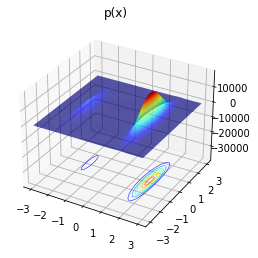

In [5]:
dist = plot_distribution(target, bounds=[[-3, 3], [-3, 3]], n_points=300)

# Let's fit with KL

In [6]:
dim=2
n_samples_estimation = int(1e3)
torch.manual_seed(0) # 0
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=5, scaling_factor=8, use_exp=False)  # , flow_type="RealNVP"
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl") 
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

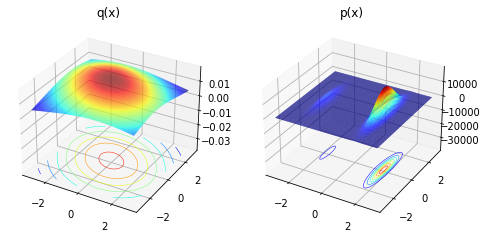

In [7]:
fig_before_train = plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)

In [8]:
history = tester.train(10000, batch_size=int(1e3)) # epochs 1000

loss: -10.136667251586914, mean log p_x 8.46462345123291: 100%|██████████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:19<00:00, 31.31it/s]


In [9]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 4.065181732177734 
estimate after training is 3.70455265045166 
effective sample size before is 53.299137115478516 out of 1000
effective sample size after train is 905.8344116210938  out of 1000
variance in weights is 1.0405855732642522e-07


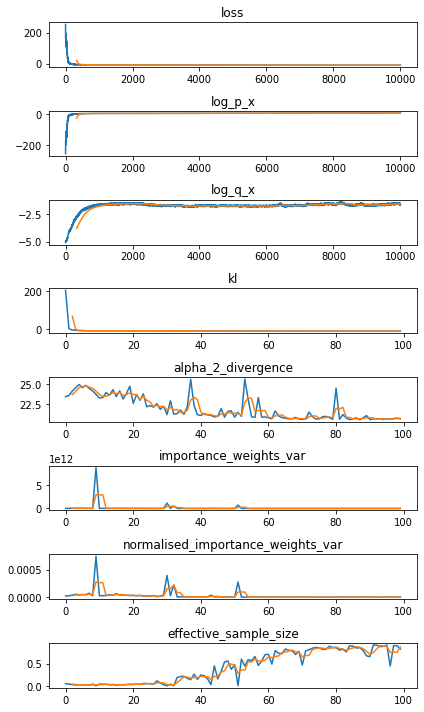

In [10]:
hist_fig = plot_history(history)

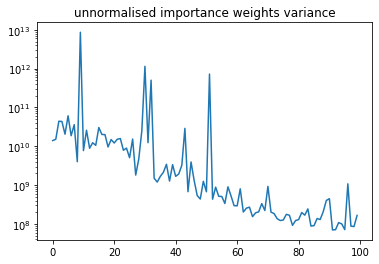

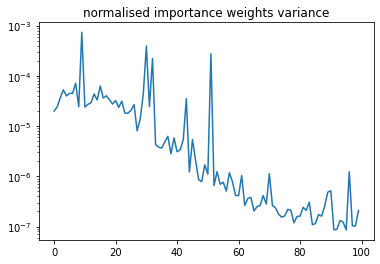

In [11]:
plot_sampling_info(history)

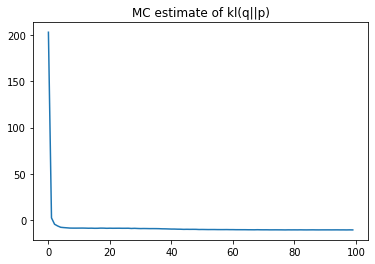

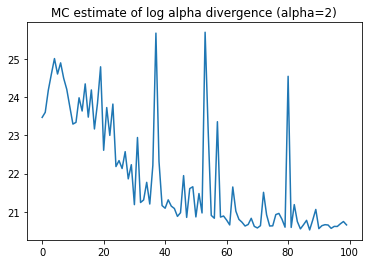

In [12]:
plot_divergences(history)

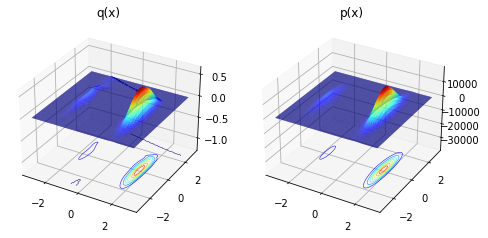

In [13]:
fig_after_train = plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)

In [19]:
def plot_samples_single_dist(distribution, n_samples = 1000):
    samples_q = distribution.sample((n_samples,)).detach()
    fig, axs = plt.subplots(1)
    axs.scatter(samples_q[:, 0], samples_q[:, 1])
    axs.set_title("q(x) samples")

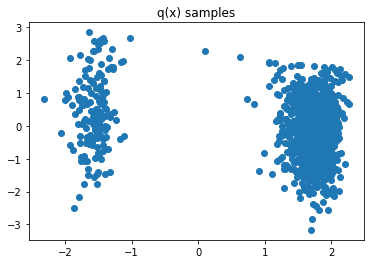

In [20]:
plot_samples_single_dist(tester.learnt_sampling_dist, n_samples=1000)

# Let's fit with alpha divergence

In [31]:
dim=2
n_samples_estimation = int(1e3)
batch_size = int(1e3) # needs big batch size for stability
torch.manual_seed(0) # 0
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=5, scaling_factor=8, use_exp=False) # , flow_type="RealNVP"
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG") 
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

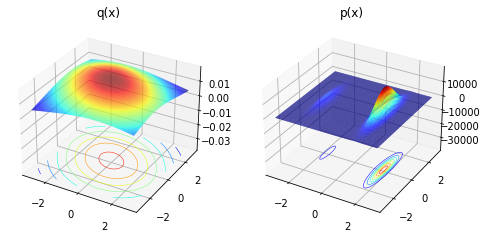

In [32]:
fig_before_train = plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)

In [33]:
history = tester.train(10000, batch_size=batch_size, clip_grad=True, max_grad_norm=5, break_on_inf=False) # epochs 1000

loss: -10.45226764678955, mean log p_x 8.034829139709473: 100%|██████████████████████████████████████████████████████████████████████████████████| 10000/10000 [14:21<00:00, 11.61it/s]


In [34]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 4.065181732177734 
estimate after training is 3.883244752883911 
effective sample size before is 53.299137115478516 out of 1000
effective sample size after train is 855.3699340820312  out of 1000
variance in weights is 1.6925409340728947e-07


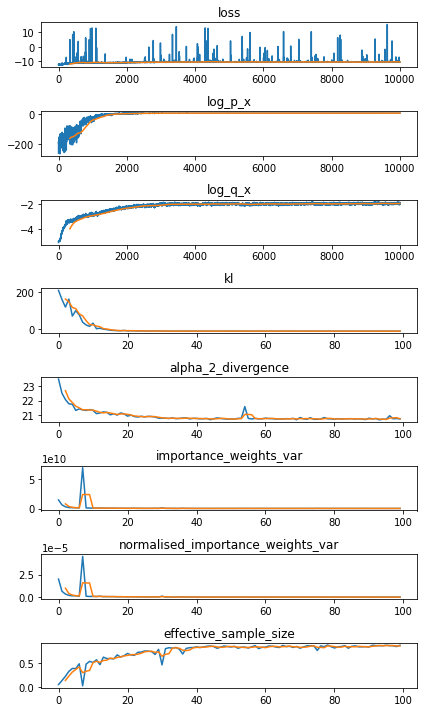

In [35]:
hist_fig = plot_history(history)

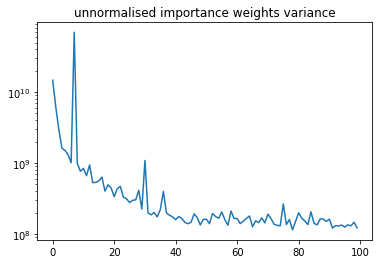

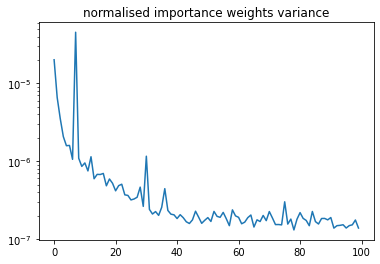

In [36]:
plot_sampling_info(history)

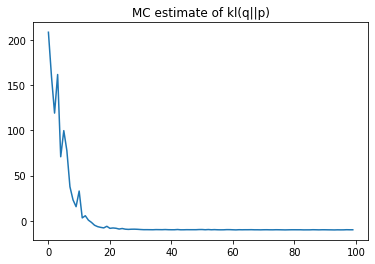

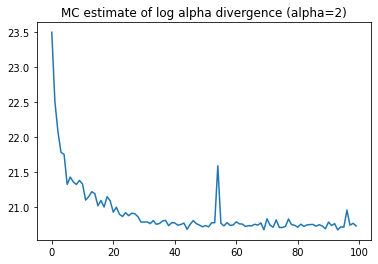

In [37]:
plot_divergences(history)

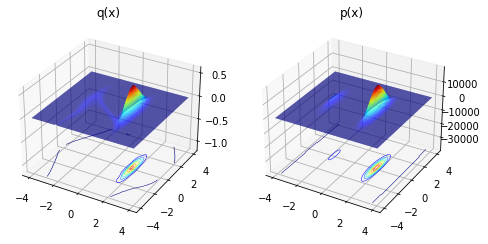

In [38]:
fig_after_train = plot_distributions(tester, bounds=[[-4, 4], [-4, 4]], n_points=150)

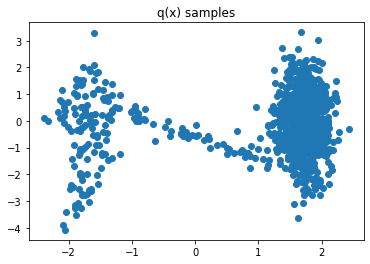

In [39]:
plot_samples_single_dist(tester.learnt_sampling_dist, n_samples=1000)